## Instalar pacote DEAP e importar o que for necessário

In [0]:
# https://deap.readthedocs.io/en/master/
!pip install deap

     |████████████████████████████████| 163kB 4.6MB/s 


In [0]:
# Bibliotecas a serem utilizadas
import random
import numpy
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

## Preparação para Otimização

1.   Função Objetivo
2.   Penalização
3.   Variáveis de Decisão
4.   Operadores



In [0]:
# Função Objetivo
def objective_function(individual):
    return (individual[0]*3000)+(individual[1]*5000),

# Verificar se indivíduo é válido
def feasible(individual):
  if individual[0] > 4:
    return False
  if individual[1]*2 > 12:
    return False
  if individual[0]*3 + individual[1]*2 > 18:
    return False
  return True

# Penalização para indivíduos inválidos
def distance(individual):
  constraint1 = abs(individual[0] - 4)
  constraint2 = abs(individual[1]*2 - 12)
  constraint3 = abs(individual[0]*3 + individual[1]*2 - 18)

  return (constraint1 + constraint2 + constraint3)**2

In [0]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))        # função objetivo: nome, tipo(f.o.), peso de cada objetivo (no caso só um objetivo)
creator.create("Individual", list,  fitness=creator.FitnessMax)   # indivíduo

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [0]:
toolbox = base.Toolbox()

# Gerador de atributos inteiros: nome, tipo das variáveis, intervalo (limites inferior e superior)
toolbox.register("attr_int", random.randint, 0, 10)

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 2)   # 2: número de variáveis de decisão
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                  # lista de indivíduos

In [0]:
def mutation_gaussian(individual):
    size = int(len(individual))
    gene_idx = random.randint(0, size-1)
    mu = individual[gene_idx]
    rnd = random.gauss(mu, 10)    
    individual[gene_idx] = int(rnd)        
    return individual,

In [0]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                                        # função objetivo
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 0, distance))                 # penalização para indivíduos inválidos: função de validade, valor retornado da f.o. quando inválido
toolbox.register("mate", tools.cxOnePoint)
# toolbox.register("mutate", tools.mutUniformInt, low=0, up=10000, indpb=0.05)            # eu implementaria outra mutação: abaixo
toolbox.register("mutate", mutation_gaussian)
toolbox.register("select", tools.selTournament, tournsize=3)

In [0]:
pop = toolbox.population(n=100)                           # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

## Otimização

In [0]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.7, ngen=200, stats=stats, halloffame=hof, verbose=True) #aumentei mut = 0.7

gen	nevals	avg   	std    	min  	max  
0  	100   	4402.8	9428.47	-1764	36000
1  	90    	-695.92	19936  	-90000	36000
2  	88    	2243.88	23125.2	-99000	36000
3  	89    	3418.68	19620.2	-58000	36000
4  	85    	2534.28	19964.5	-96000	36000
5  	76    	5446.76	17788.8	-58000	31000
6  	87    	4558.04	19008.9	-74000	33000
7  	87    	4300.2 	19386.8	-75000	36000
8  	87    	3980.88	19574.2	-57000	36000
9  	86    	1961.96	23689.2	-98000	36000
10 	85    	4733.12	16924.6	-37000	36000
11 	86    	3618   	21316.8	-72000	36000
12 	82    	4463.72	22103.5	-102000	36000
13 	84    	7937.64	19856.7	-73000 	36000
14 	85    	4649.84	23860  	-99000 	36000
15 	86    	8002   	18727  	-47000 	36000
16 	85    	4601.72	22190.3	-89000 	36000
17 	86    	2715.12	22828.6	-69000 	36000
18 	86    	7816.12	20826.7	-87000 	36000
19 	86    	8840.76	19110  	-74000 	36000
20 	89    	3619.12	21258.4	-62000 	36000
21 	86    	5308.88	21157.2	-62000 	36000
22 	90    	6230.68	16512.8	-50000 	36000
23 	82    	5047.52	19674.8	-75000

## Resultados

In [0]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof)

# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
objective_function(hof[0])

Melhor Indivíduo:
[[2, 6]]
Melhor Resultado da Função Objetivo:


(36000,)

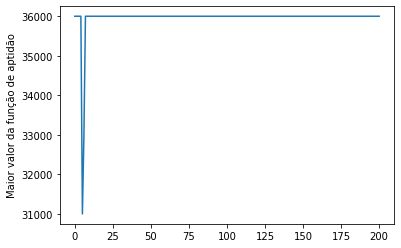

In [0]:
import matplotlib.pyplot as plt
gen, avg = log.select("gen", "max")
plt.plot(gen, avg)
plt.ylabel('Maior valor da função de aptidão')
plt.show()